# Exercício sobre regressão de preços de residências usando redes neurais densas (DNNs)

Neste exercício, você irá treinar a mesma rede neural do exemplo visto em sala de aula.

Entretanto, nenhum escalonamento (padronização ou normalização) será aplicado aos atributos.

**Execute todas as células de código abaixo, analise e compare os resultados com aqueles obtidos no exemplo visto em sala de aula e, ao final, conclua se o escalonamento é benéfico ou não? Ou seja, vale a pena escalonar?** (**Justifique sua resposta**).

### Nome: Hyaga Vieira Lemes Barbosa Silva
### Matrícula: 922

## Importando as bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

## Baixando a base de dados

Neste exercício, utilizaremos uma rede neural para aproximar o conjunto de dados do Boston Housing e predizer o custo médio de uma casa em uma área de Boston.

**Objetivo**

O objetivo é treinar um modelo de regressão que prediga o valor médio das casas naquela área usando os 13 atributos fornecidos.

**Observação**

Por padrão, a função `load_data` divide o conjunto total de exemplos em 80% para treinamento e 20% para testes.

In [16]:
data = tf.keras.datasets.boston_housing

(x_train, y_train), (x_test, y_test) = data.load_data()

## Definindo o modelo

In [18]:
input_shape = x_train.shape[1]

In [19]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Dense(20, input_shape=[input_shape], activation='relu'),
        tf.keras.layers.Dense(1)
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                280       
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 301 (1.18 KB)
Trainable params: 301 (1.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## Compilando o modelo

In [5]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'] # métrica usada para monitorar as etapas de treinamento e teste.
)

## Treinando o modelo


In [6]:
history = model.fit(
    x_train,
    y_train,
    epochs=1000,
)

Epoch 1/1000
13/13 [==============================] - 1s 3ms/step - loss: 1366.8258 - mae: 32.9231
Epoch 2/1000
13/13 [==============================] - 0s 2ms/step - loss: 526.7595 - mae: 18.2143
Epoch 3/1000
13/13 [==============================] - 0s 2ms/step - loss: 374.8276 - mae: 14.5150
Epoch 4/1000
13/13 [==============================] - 0s 2ms/step - loss: 233.6272 - mae: 11.8310
Epoch 5/1000
13/13 [==============================] - 0s 2ms/step - loss: 171.4619 - mae: 10.1815
Epoch 6/1000
13/13 [==============================] - 0s 2ms/step - loss: 139.1178 - mae: 9.2471
Epoch 7/1000
13/13 [==============================] - 0s 2ms/step - loss: 123.9951 - mae: 8.7508
Epoch 8/1000
13/13 [==============================] - 0s 2ms/step - loss: 115.5045 - mae: 8.3715
Epoch 9/1000
13/13 [==============================] - 0s 2ms/step - loss: 109.1231 - mae: 8.1285
Epoch 10/1000
13/13 [==============================] - 0s 2ms/step - loss: 104.0032 - mae: 7.9773
Epoch 11/1000
13/13 [==

## Veja abaixo o treinamento do modelo com escalonamento, o loss foi reduzido em 3x mais

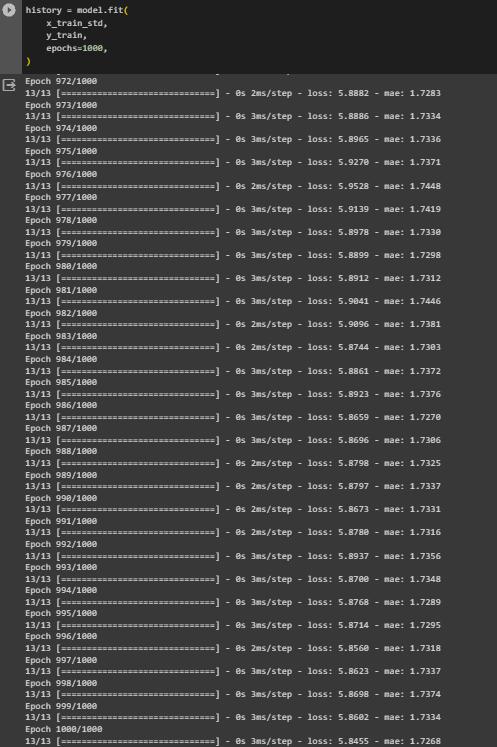

### Veja os dados da cada coluna, alguns dados são como 0 ou 1, ou seja sim ou não, que seria o CHAS (Charles River dummy variable) que significa (= 1 if tract bounds river; 0 otherwise), enfim, de qualquer forma analise outros dados além destes qualquer que seja, veja a escala dos valores, e a variação com que este está ocorrendo, temos máximos 400, 350, 120, 80 ... ou seja não possui um padrão, no aprendizado de máquina é interessante que o dado esteja normalizado ou padronizado com a utilização de escalonamento.

In [21]:
print('Máx. sem o escalonamento:', x_train.max())
print('Mín. sem o escalonamento:', x_train.min())

Máx. sem o escalonamento: 711.0
Mín. sem o escalonamento: 0.0


In [23]:
for i in range(len(x_train[0])):
    print("Atributo {} ==> varia de {} a {}".format(
      i+1, x_train[:,i].min(), x_train[:,i].max()
      )
  )

Atributo 1 ==> varia de 0.00632 a 88.9762
Atributo 2 ==> varia de 0.0 a 100.0
Atributo 3 ==> varia de 0.46 a 27.74
Atributo 4 ==> varia de 0.0 a 1.0
Atributo 5 ==> varia de 0.385 a 0.871
Atributo 6 ==> varia de 3.561 a 8.725
Atributo 7 ==> varia de 2.9 a 100.0
Atributo 8 ==> varia de 1.1296 a 10.7103
Atributo 9 ==> varia de 1.0 a 24.0
Atributo 10 ==> varia de 188.0 a 711.0
Atributo 11 ==> varia de 12.6 a 22.0
Atributo 12 ==> varia de 0.32 a 396.9
Atributo 13 ==> varia de 1.73 a 37.97


array([[<Axes: title={'center': 'CRIM'}>, <Axes: title={'center': 'ZN'}>,
        <Axes: title={'center': 'INDUS'}>,
        <Axes: title={'center': 'CHAS'}>],
       [<Axes: title={'center': 'NOX'}>, <Axes: title={'center': 'RM'}>,
        <Axes: title={'center': 'AGE'}>, <Axes: title={'center': 'DIS'}>],
       [<Axes: title={'center': 'RAD'}>, <Axes: title={'center': 'TAX'}>,
        <Axes: title={'center': 'PTRATIO'}>,
        <Axes: title={'center': 'B'}>],
       [<Axes: title={'center': 'LSTAT'}>, <Axes: >, <Axes: >, <Axes: >]],
      dtype=object)

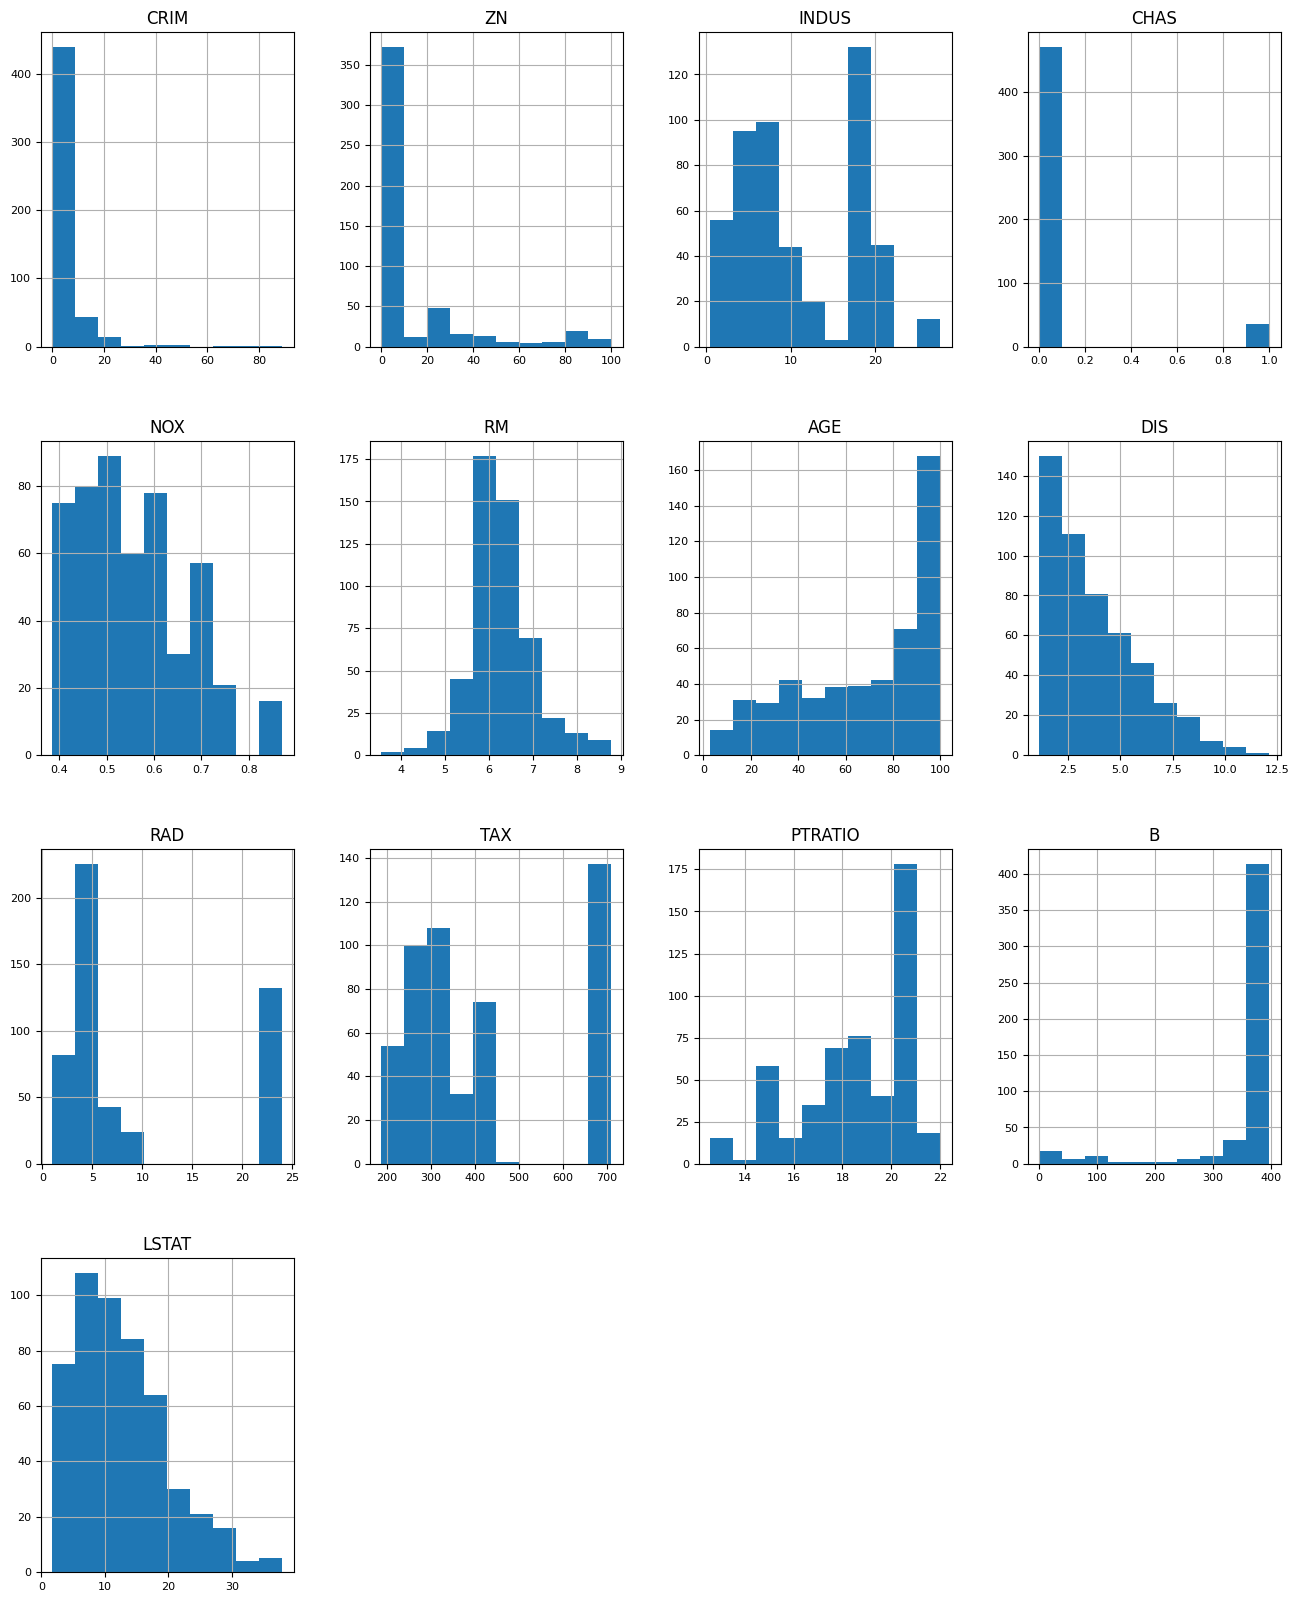

In [7]:
# Biblioteca para análise e manipulação de dados.
import pandas as pd

# Concatena os dois conjuntos em apenas um.
x = np.vstack([x_train, x_test])

# Cria um objeto do tipo DataFrame.
df = pd.DataFrame(x, columns=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT'])

# Plota os histogramas de todos os atributos.
df.hist(figsize=(16, 20), xlabelsize=8, ylabelsize=8)

# Escalonamento é um Pré-processamento dos dados. Como percebemos, os atributos têm diferentes intervalos de valores.
### Uma notação importante que foi escrita no notebook de aula é que quando os atributos têm intervalos de valores muito diferentes, os modelos de aprendizado de máquina, podem ser afetados com:

- **Influência desproporcional**: O modelo dar mais importância a valores que possui maiores valores e maiores diferênças e menos importância aos atributos com intervalos menores.

- **Dificuldade de convergência**: Algoritmos de otimização, como o gradiente descendente, podem ter dificuldade em convergir rapidamente quando os atributos têm escalas muito diferentes. Isso pode resultar em um treinamento mais lento ou até mesmo na não convergência do modelo. É como se a superfície fosse mais irregular do que o normal

O escalonamento de dados serve para garantir que os atributos estejam em uma escala compatível e comparável, melhorando assim o desempenho e a eficácia de muitos algoritmos de aprendizado.

### Avaliando o modelo treinado no conjunto de treinamento

In [8]:
train_eval = model.evaluate(x_train, y_train)

print ("MSE no conjunto de treinamento: {:.5}".format(train_eval[0]))
print ("MAE no conjunto de treinamento: {:.5}".format(train_eval[1]))

13/13 [==============================] - 0s 2ms/step - loss: 17.6182 - mae: 3.2445
MSE no conjunto de treinamento: 17.618
MAE no conjunto de treinamento: 3.2445


### Plotando os erros

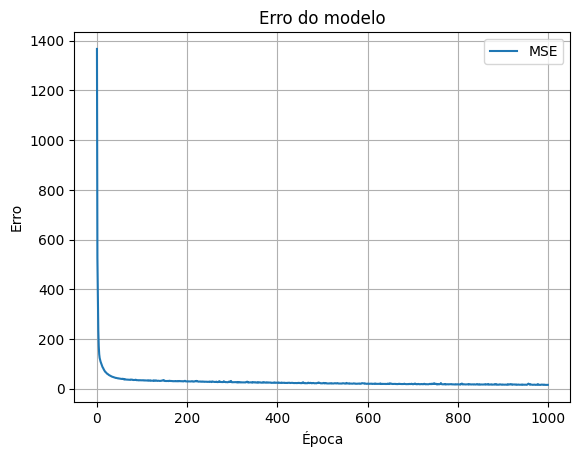

In [9]:
plt.plot(history.history['loss'], label='MSE')
plt.title('Erro do modelo')
plt.ylabel('Erro')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

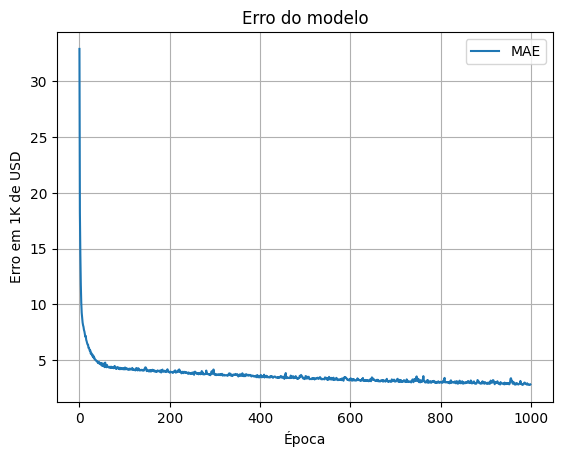

In [10]:
plt.plot(history.history['mae'], label='MAE')
plt.title('Erro do modelo')
plt.ylabel('Erro em 1K de USD')
plt.xlabel('Época')
plt.legend(loc='upper right')
plt.grid()
plt.show()

### O valor de erro é bem menor, e a convergência é mais rápida

### Veja o erro no modelo com escalonamento, neste print abaixo:

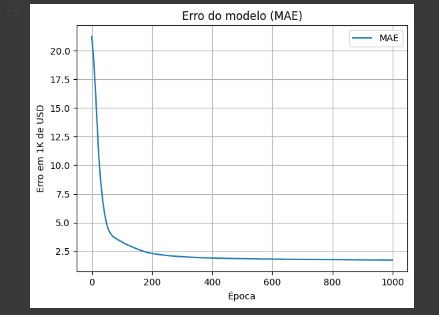

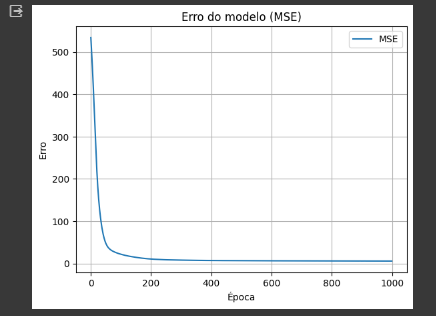

## Testando o modelo treinado no conjunto de teste
### Medindo a capacidade de generalização



In [11]:
test_eval = model.evaluate(x_test, y_test)

print ("MSE no conjunto de teste: {:.5}".format(test_eval[0]))
print ("MAE no conjunto de teste: {:.5}".format(test_eval[1]))

4/4 [==============================] - 0s 4ms/step - loss: 21.1329 - mae: 3.5938
MSE no conjunto de teste: 21.133
MAE no conjunto de teste: 3.5938


#### Comparando os 5 primeiros valores preditos com o esperados. Abaixo a imagem printada das predições feitas com o modelo com escalonamento na célula compilável contém sem escalonamento veja

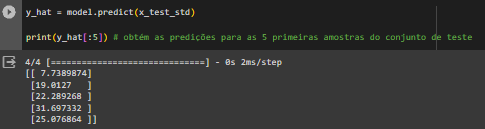

In [12]:
y_hat = model.predict(x_test)

print(y_hat[:5]) # obtém as predições para as 5 primeiras amostras do conjunto de teste

4/4 [==============================] - 0s 2ms/step
[[10.100727]
 [20.275337]
 [24.978748]
 [30.747871]
 [26.045292]]


In [22]:
print(y_test[:520]) # obtém os valores esperados para as 5 primeiras amostras

[ 7.2 18.8 19.  27.  22.2 24.5 31.2 22.9 20.5 23.2 18.6 14.5 17.8 50.
 20.8 24.3 24.2 19.8 19.1 22.7 12.  10.2 20.  18.5 20.9 23.  27.5 30.1
  9.5 22.  21.2 14.1 33.1 23.4 20.1  7.4 15.4 23.8 20.1 24.5 33.  28.4
 14.1 46.7 32.5 29.6 28.4 19.8 20.2 25.  35.4 20.3  9.7 14.5 34.9 26.6
  7.2 50.  32.4 21.6 29.8 13.1 27.5 21.2 23.1 21.9 13.  23.2  8.1  5.6
 21.7 29.6 19.6  7.  26.4 18.9 20.9 28.1 35.4 10.2 24.3 43.1 17.6 15.4
 16.2 27.1 21.4 21.5 22.4 25.  16.6 18.6 22.  42.8 35.1 21.5 36.  21.9
 24.1 50.  26.7 25. ]


#### Comparando os histogramas dos valores preditos e esperados.

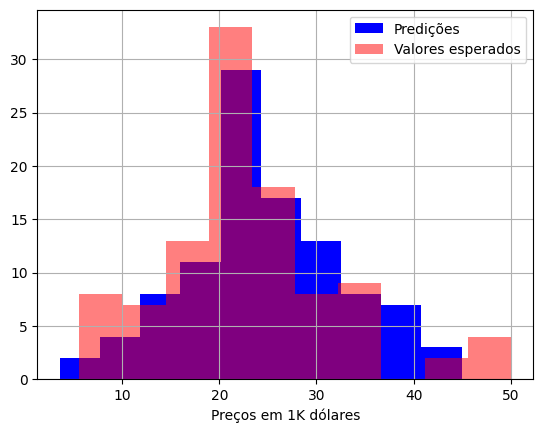

In [14]:
plt.hist(y_hat, label='Predições', color = 'b')
plt.hist(y_test, label = 'Valores esperados', color = 'r', alpha=0.5)
plt.xlabel('Preços em 1K dólares')
plt.legend()
plt.grid()
plt.show()

### Veja o histograma com escalonamento abaixo
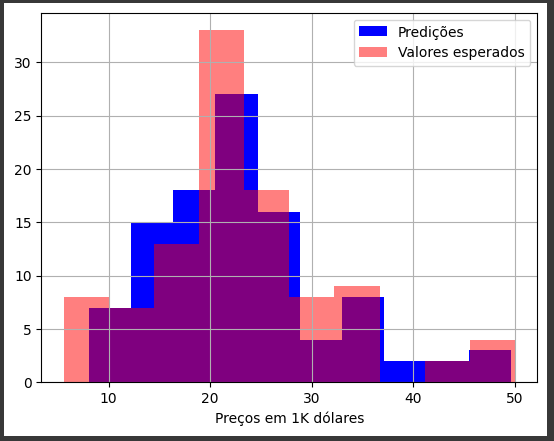

### Mesmo que são parecidos, é importante destacar que dados sem padrão, quanto mais diferentes forem pior, pois geram discrepância no treinamento.

### Respondendo a pergunta, sim é benéfico e é bom escalonar para este exeplo. Mas a decisão de escalonar os dados depende do algoritmo e do contexto. Para algoritmos sensíveis à escala, como regressão linear e KNN, o escalonamento ajuda a evitar que características com escalas diferentes dominem o modelo. Redes neurais profundas geralmente se beneficiam do escalonamento. Árvores de decisão não exigem escalonamento. Algoritmos de agrupamento, como o K-Means, podem se beneficiar do escalonamento. Algoritmos como redes Bayesianas e Naive Bayes não exigem escalonamento. Experimente diferentes abordagens e avalie o desempenho do modelo. O escalonamento pode melhorar a convergência e a qualidade das previsões em muitos casos.